In [1]:
from ema_workbench import load_results
import matplotlib.pyplot as plt
from ema_workbench.analysis import plotting
import pandas as pd
import os
from ema_workbench.analysis import prim, pairs_plotting, feature_scoring


In [2]:

uncertainties = ['n_actions',
        'max_action',
        'n_fragments',
        'rewiring_rate',
        'num_voting_agents',
        'energy_consumption',
        'innovation_rate']
outcomes = ['num_institutions',
            "mean_inst_age",
            "variance_inst_age",
            "agents_avg_consumption",
            "mean_in_degree",
            "variance_in_degree",
            "mean_comb_degree",
            "variance_comb_degree",
]

In [3]:
file_path = 'PRIM_results_/PRIM_data.csv'
if os.path.exists(file_path):
    data_frame = pd.read_csv(file_path)

In [4]:
data_frame
# num_institutions, emergence_time, mean_inst_age, variance_inst_age, \
#         agents_avg_consumption, mean_in_degree, variance_in_degree, \
#         mean_comb_degree, variance_comb_degree, p_total_mean, p_total_variance,\
#         p_geo_mean, p_geo_variance, seed

,energy_consumption,innovation_rate,max_action,n_actions,n_fragments,num_voting_agents,rewiring_rate,scenario,policy,model,num_institutions,agents_avg_consumption,mean_in_degree,variance_in_degree,mean_comb_degree,variance_comb_degree,mean_inst_age,variance_inst_age,seed
0,10,0.339772,16,8,2,2,72,0,None,CPR,3,200,723.209883,238690.674439,16893.22,0.061616,0.000715,0.247273,0.008574
1,17,0.178199,19,8,2,51,11,1,None,CPR,2,200,901.000000,270300.000000,36224.07,0.061616,0.001517,0.256566,0.011397
2,9,0.280699,19,2,3,54,76,2,None,CPR,1,0,0.000000,0.000000,31946.79,0.183838,0.004600,0.473131,0.014735
3,17,0.449121,12,5,1,55,8,3,None,CPR,11,200,100.444753,3336.893255,18410.02,0.084444,0.001423,0.297576,0.012383
4,19,0.318260,19,7,4,41,88,4,None,CPR,2,200,901.000000,270300.000000,36234.38,0.067273,0.002243,0.261818,0.011443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,0.635403,12,4,3,62,15,495,None,CPR,1,0,0.000000,0.000000,19934.19,0.110303,0.002787,0.340606,0.012432
496,13,0.072304,20,8,2,2,34,496,None,CPR,10,200,100.555802,3337.004243,9742.64,0.061616,0.000748,0.252121,0.009534
497,6,0.374400,18,4,2,98,92,497,None,CPR,1,0,0.000000,0.000000,25689.42,0.110202,0.003126,0.344646,0.015091
498,14,0.992946,16,2,4,38,73,498,None,CPR,1,0,0.000000,0.000000,31524.16,0.183636,0.001282,0.469293,0.006974


In [4]:
new_column_names = ['num_institutions', 'emergence_time', 'mean_inst_age', 'variance_inst_age', \
        'agents_avg_consumption', 'mean_in_degree', 'variance_in_degree', \
        'mean_comb_degree', 'variance_comb_degree']
# data_frame.iloc[:, 10:] = data_frame.iloc[:, 10:].rename(columns=dict(zip(data_frame.iloc[:, 10:].columns, new_column_names)), inplace=True)

old_new_names = dict(zip(data_frame.columns[10:], new_column_names))
data_frame.rename(columns=old_new_names, inplace=True)
data_frame

,energy_consumption,innovation_rate,max_action,n_actions,n_fragments,num_voting_agents,rewiring_rate,scenario,policy,model,num_institutions,emergence_time,mean_inst_age,variance_inst_age,agents_avg_consumption,mean_in_degree,variance_in_degree,mean_comb_degree,variance_comb_degree
0,10,0.339772,16,8,2,2,72,0,None,CPR,3,200,723.209883,238690.674439,16893.22,0.061616,0.000715,0.247273,0.008574
1,17,0.178199,19,8,2,51,11,1,None,CPR,2,200,901.000000,270300.000000,36224.07,0.061616,0.001517,0.256566,0.011397
2,9,0.280699,19,2,3,54,76,2,None,CPR,1,0,0.000000,0.000000,31946.79,0.183838,0.004600,0.473131,0.014735
3,17,0.449121,12,5,1,55,8,3,None,CPR,11,200,100.444753,3336.893255,18410.02,0.084444,0.001423,0.297576,0.012383
4,19,0.318260,19,7,4,41,88,4,None,CPR,2,200,901.000000,270300.000000,36234.38,0.067273,0.002243,0.261818,0.011443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,0.635403,12,4,3,62,15,495,None,CPR,1,0,0.000000,0.000000,19934.19,0.110303,0.002787,0.340606,0.012432
496,13,0.072304,20,8,2,2,34,496,None,CPR,10,200,100.555802,3337.004243,9742.64,0.061616,0.000748,0.252121,0.009534
497,6,0.374400,18,4,2,98,92,497,None,CPR,1,0,0.000000,0.000000,25689.42,0.110202,0.003126,0.344646,0.015091
498,14,0.992946,16,2,4,38,73,498,None,CPR,1,0,0.000000,0.000000,31524.16,0.183636,0.001282,0.469293,0.006974


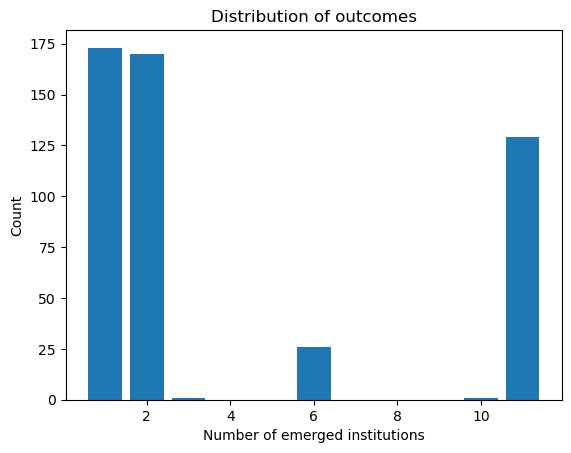

In [13]:
value_counts = data_frame['num_institutions'].value_counts()
# Plotting the distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of emerged institutions')
plt.ylabel('Count')
plt.title('Distribution of outcomes')
plt.savefig(os.path.join('PRIM_results_/figures/distribution of outcomes.png'))
plt.show()

In [14]:
value_counts

1     173
2     170
11    129
6      26
3       1
10      1
Name: num_institutions, dtype: int64

In [6]:
outcomes = new_column_names
experiments_df = data_frame.filter(uncertainties, axis=1).copy()
outcomes_df = data_frame.filter(outcomes, axis=1).copy()

In [7]:
# new_column_names = ['num_institutions', 'emergence_time', 'mean_inst_age', 'variance_inst_age', \
#         'agents_avg_consumption', 'mean_in_degree', 'variance_in_degree', \
#         'mean_comb_degree', 'variance_comb_degree']
# outcomes_df.rename(columns=dict(zip(outcomes_df.columns, new_column_names)), inplace=True)

In [8]:
outcomes_dict = outcomes_df.copy().to_dict()


In [9]:
# fig, axes = pairs_plotting.pairs_scatter(experiments_df, outcomes_dict)#, group_by="policy", legend=False)
# # fig.set_size_inches(8, 8)
# plt.show()

In [10]:
data = outcomes_df['num_institutions']

y = data > 1



In [11]:
prim_alg = prim.Prim(experiments_df, y, threshold=0.8)
box1 = prim_alg.find_box()

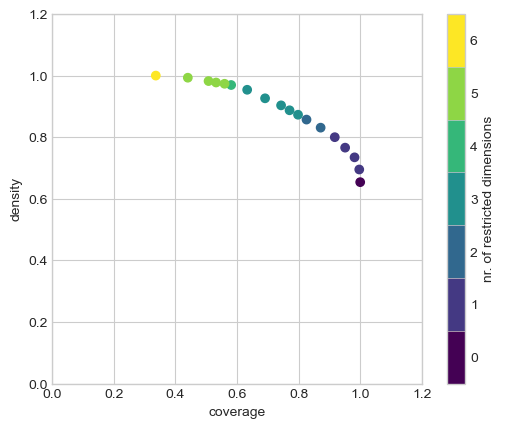

In [12]:
plt.style.use('seaborn-whitegrid')
box1.show_tradeoff()
plt.savefig(os.path.join('PRIM_results_/figures/PRIM_peeling_trajectory.png'))
plt.show()

coverage     0.336391
density      1.000000
id          17.000000
mass         0.220000
mean         1.000000
res_dim      6.000000
Name: 17, dtype: float64

                       box 17                                    
                          min         max      qp value  qp value
innovation_rate      0.001233    0.774558           NaN  0.002032
max_action          10.000000   19.000000           NaN  0.382623
energy_consumption  12.000000   20.000000  3.903828e-12       NaN
n_actions            4.000000   10.000000  1.983591e-01       NaN
n_fragments          2.000000    4.000000  4.670828e-01       NaN
num_voting_agents    7.000000  100.000000  1.000000e+00       NaN



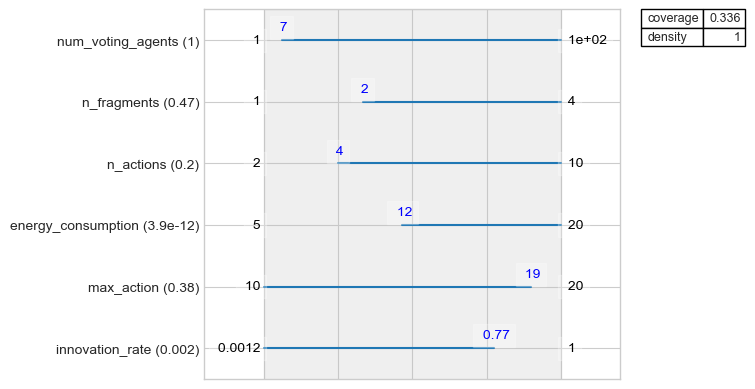

In [14]:
n_box = 17
box1.inspect(n_box)
box1.inspect(n_box, style='graph')
plt.savefig(os.path.join('PRIM_results_/figures/', f'PRIM_box{n_box}.png'), bbox_inches='tight')
plt.show()


coverage    0.798165
density     0.872910
id          7.000000
mass        0.598000
mean        0.872910
res_dim     3.000000
Name: 7, dtype: float64

                        box 7                                   
                          min        max      qp value  qp value
max_action          10.000000  19.000000           NaN  0.143062
innovation_rate      0.001233   0.944051           NaN  0.246280
energy_consumption  10.000000  20.000000  2.615645e-12       NaN



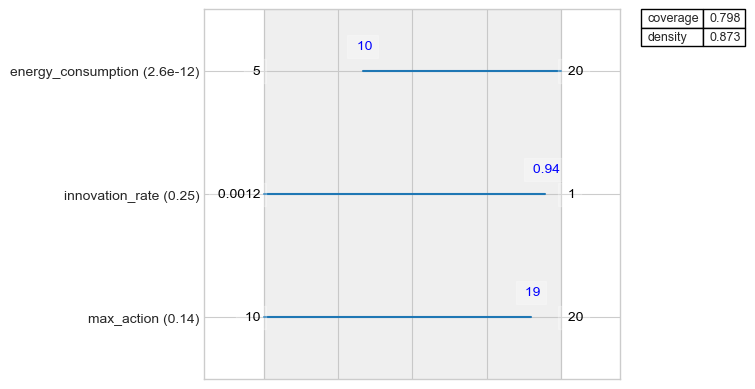

In [ ]:
box1.inspect(7)
box1.inspect(7, style='graph')
plt.show()

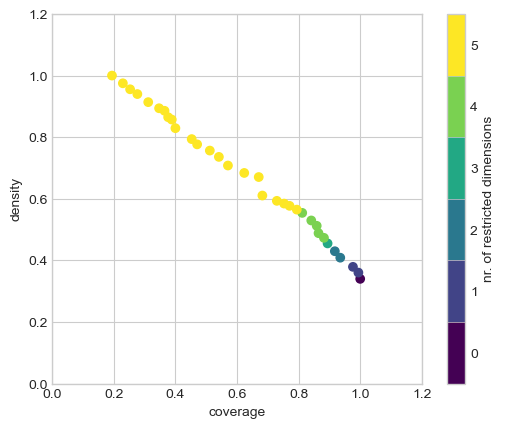

In [ ]:
y2 = data == 2
prim_alg2 = prim.Prim(experiments_df, y2, threshold=0.8)
box2 = prim_alg2.find_box()
plt.style.use('seaborn-whitegrid')
box2.show_tradeoff()
plt.show()

coverage    0.798165
density     0.872910
id          7.000000
mass        0.598000
mean        0.872910
res_dim     3.000000
Name: 7, dtype: float64

                        box 7                                   
                          min        max      qp value  qp value
max_action          10.000000  19.000000           NaN  0.143062
innovation_rate      0.001233   0.944051           NaN  0.246280
energy_consumption  10.000000  20.000000  2.615645e-12       NaN



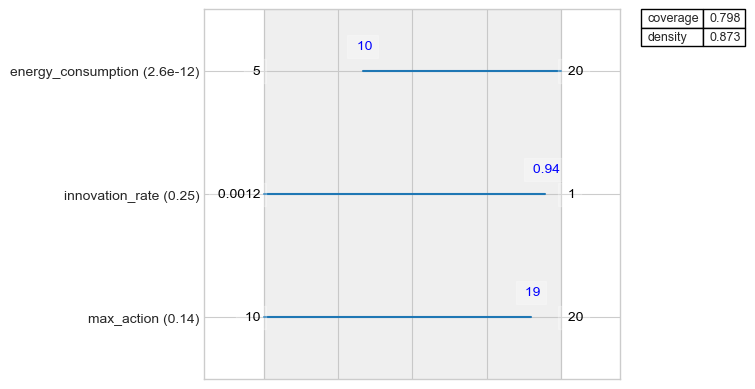

In [ ]:
box1.inspect(7)
box1.inspect(7, style='graph')
plt.show()

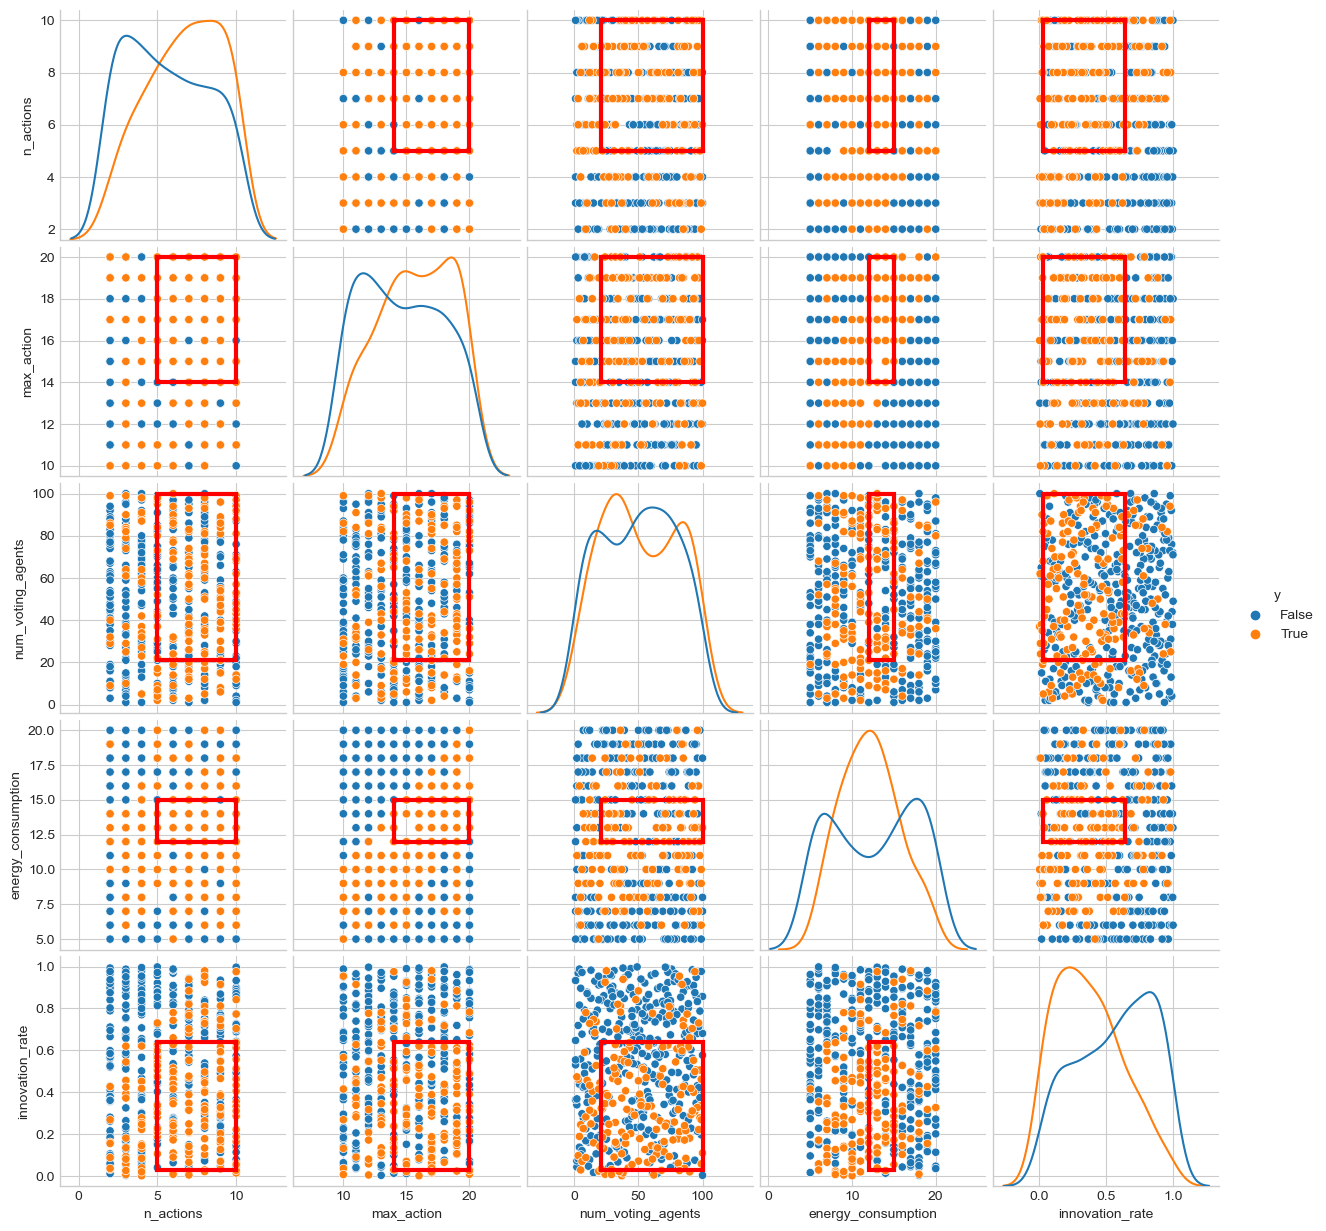

In [ ]:
box2.show_pairs_scatter()
plt.show()

In [ ]:
data2 = outcomes_df['agents_avg_consumption']

y2 = data2 > 25000

data2.mean()

25172.69504

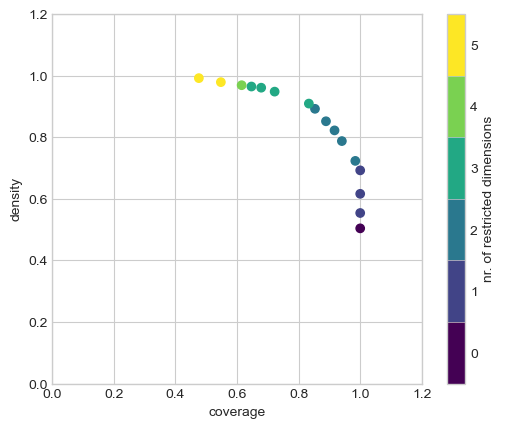

In [ ]:
prim_alg = prim.Prim(experiments_df, y2, threshold=0.8)
box3 = prim_alg.find_box()
plt.style.use('seaborn-whitegrid')
box3.show_tradeoff()
plt.show()

coverage    0.853175
density     0.892116
id          8.000000
mass        0.482000
mean        0.892116
res_dim     2.000000
Name: 8, dtype: float64

                   box 8                             
                     min   max      qp value qp value
max_action          14.0  20.0  1.260672e-23      NaN
energy_consumption   9.0  20.0  6.758979e-08      NaN



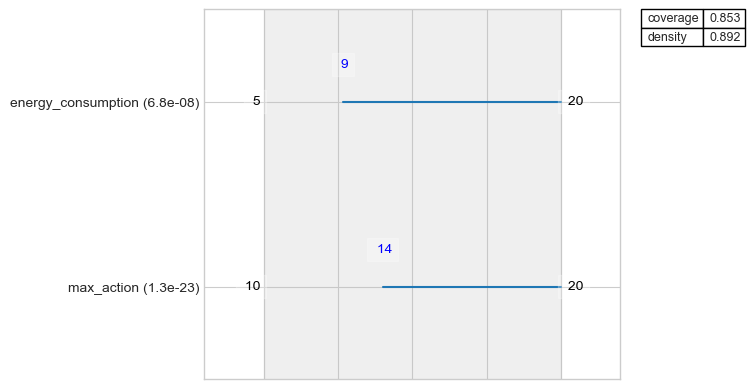

In [ ]:
box3.inspect(8)
box3.inspect(8, style='graph')
plt.show()

In [ ]:
outcomes_df['emergence_time'].value_counts()

200     313
0       173
400       6
1000      4
800       3
600       1
Name: emergence_time, dtype: int64

In [ ]:
data3 = outcomes_df['emergence_time']

y3 = data3 > 200

filtered_rows = outcomes_df[outcomes_df['emergence_time'] > 200]

y3.value_counts()

False    486
True      14
Name: emergence_time, dtype: int64

In [ ]:
experiments_df

,n_actions,max_action,n_fragments,rewiring_rate,num_voting_agents,energy_consumption,innovation_rate
0,8,16,2,72,2,10,0.339772
1,8,19,2,11,51,17,0.178199
2,2,19,3,76,54,9,0.280699
3,5,12,1,8,55,17,0.449121
4,7,19,4,88,41,19,0.318260
...,...,...,...,...,...,...,...
495,4,12,3,15,62,10,0.635403
496,8,20,2,34,2,13,0.072304
497,4,18,2,92,98,6,0.374400
498,2,16,4,73,38,14,0.992946


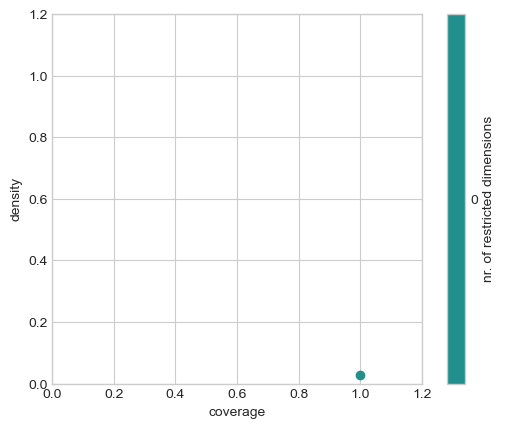

In [ ]:
prim_alg = prim.Prim(experiments_df, y3, threshold=0.8)
box4 = prim_alg.find_box()
plt.style.use('seaborn-whitegrid')
box4.show_tradeoff()
plt.show()

coverage    1.000
density     0.028
id          0.000
mass        1.000
mean        0.028
res_dim     0.000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []



c:\Conda\envs\thesis_model\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:450: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax.set_ylim(top=-0.5, bottom=nr_unc - 0.5)


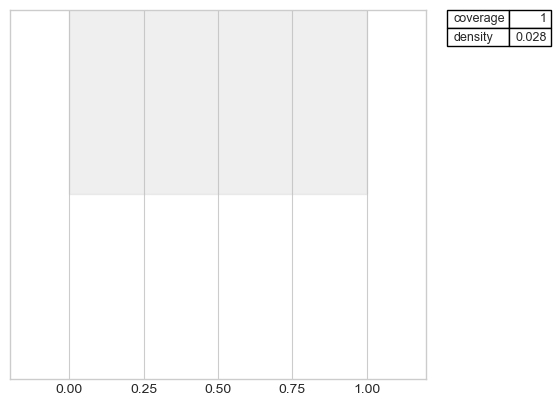

In [ ]:
box4.inspect()
box4.inspect( style='graph')
plt.show()

In [ ]:
x = experiments_df
y = outcomes_dict['emergence_time']
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

TypeError: Singleton array array(200) cannot be considered a valid collection.

In [ ]:
box4.show_pairs_scatter()
plt.show()

ValueError: No variables found for grid columns.

In [ ]:


# output_folder = 'PRIM_results/figures/' + uncertainty
# os.makedirs(output_folder, exist_ok=True)
# for outcome in outcomes:
#     plt.figure()
#     plt.scatter(data_frames[uncertainty][uncertainty], data_frames[uncertainty][outcome])
#     plt.xlabel(uncertainty)
#     plt.ylabel(outcome)
#     plt.title(f'{outcome} vs. {uncertainty}')
#     plt.savefig(os.path.join(output_folder, f'{outcome}_vs_{uncertainty}.png'))
#     plt.close()  # Close the figure to release resources
#     plt.show()

In [ ]:
# uncertainty = "n_fragments"

# for outcome in outcomes:
#     plt.figure()
#     plt.scatter(df_avg[uncertainty], df_avg[outcome])
#     plt.xlabel(uncertainty)
#     plt.ylabel(outcome)
#     plt.title(f'{outcome} vs. {uncertainty}')
#     plt.show()

In [ ]:
# results = {}
# results['max_action'] = load_results('OFAT_results_1/max_action')
# results['n_actions'] = load_results('OFAT_results_1/n_actions')
# results['num_ticks'] = load_results('OFAT_results_1/num_ticks')
# results['weight_attribute'] = load_results('OFAT_results_1/weight_attribute')
# results['weight_triadic'] = load_results('OFAT_results_1/weight_triadic')



In [ ]:
# outcome_names = [
# "num_institutions",
# "agents_avg_consumption",
# "mean_in_degree",
# "variance_in_degree",
# "mean_comb_degree",
# "variance_comb_degree"]

In [ ]:
# # Your code to load results and define outcome_names

# output_folder = 'OFAT_results_1/figures'
# os.makedirs(output_folder, exist_ok=True)

# for parameter in results.keys():
#     experiments, outcomes = results[parameter]
#     for outcome in outcome_names:
#         plt.figure()
#         plt.scatter(experiments[parameter], outcomes[outcome])
#         plt.xlabel(parameter)
#         plt.ylabel(outcome)
#         plt.title(f'{outcome} vs. {parameter}')
#         plt.savefig(os.path.join(output_folder, f'{outcome}_vs_{parameter}.png'))
#         plt.close()  # Close the figure to release resources

# # Show all saved figures together
# plt.show()

In [ ]:
# data = {}
# for parameter in results.keys():
#     experiments, outcomes = results[parameter]
#     data[parameter] = pd.DataFrame(experiments)
#     for outcome_name in outcome_names:
#         data[parameter][outcome_name] = outcomes[outcome_name]
#     data[parameter][parameter] = experiments[parameter]

In [ ]:
# data['n_actions']

In [ ]:
# for outcome in outcome_names:
#     fig, ax = plt.subplots()
#     list_outcome = []
#     list_outcome.append(outcome)
#     plotting.lines(experiments, outcomes, list_outcome)
#     plt.xlabel("max_action")
#     plt.ylabel(outcome)
#     plt.title(f"{outcome} vs. max_action")
#     plt.show()